In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.load("triangulated_midpoints.npy"), columns=['t', 'x', 'y', 'z'])
df

,t,x,y,z
0,2.243325e+07,-54.204300,114.315665,126.609374
1,2.243393e+07,-53.112963,114.492217,126.544701
2,2.243460e+07,-52.021523,114.668825,126.479534
3,2.243528e+07,-50.929985,114.845471,126.413882
4,2.243595e+07,-49.838350,115.022135,126.347755
...,...,...,...,...
95,2.249730e+07,47.799804,127.633317,120.680508
96,2.249797e+07,48.820413,127.724485,120.631818
97,2.249865e+07,49.839268,127.815151,120.583122
98,2.249932e+07,50.856359,127.905335,120.534406


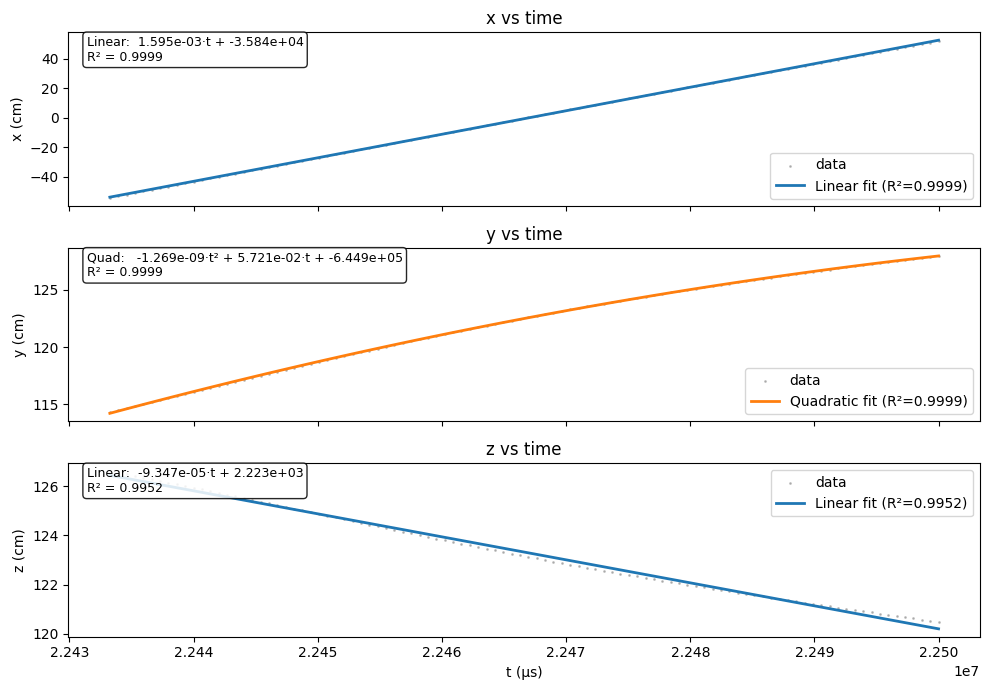

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t = df["t"].to_numpy()
x = df["x"].to_numpy()
y = df["y"].to_numpy()
z = df["z"].to_numpy()

# time_a = 0e7  # start time in µs
# time_b = 100e7  # end time in µs
# mask = (t >= time_a) & (t <= time_b)
# t = t[mask]
# x = x[mask]
# y = y[mask]

def r2_score(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return np.nan if ss_tot == 0 else (1.0 - ss_res / ss_tot)

def fit_and_plot(ax, t, v, show_linear = False, show_quad = False):
    order = np.argsort(t)
    ts = t[order]
    vs = v[order]

    # Scatter in neutral color
    ax.scatter(
        ts, vs,
        s=1,
        color="0.6",      # light gray
        alpha=0.6,
        rasterized=True,
        label="data"
    )

    if show_linear:
        #Linear fit (blue)
        p1 = np.polyfit(ts, vs, 1)
        v1 = np.polyval(p1, ts)
        r2_1 = r2_score(vs, v1)
        ax.plot(
            ts, v1,
            color="tab:blue",
            linewidth=2,
            label=f"Linear fit (R²={r2_1:.4f})"
        )

    if show_quad:
        # Quadratic fit (orange)
        p2 = np.polyfit(ts, vs, 2)
        v2 = np.polyval(p2, ts)
        r2_2 = r2_score(vs, v2)
        ax.plot(
            ts, v2,
            color="tab:orange",
            linewidth=2,
            label=f"Quadratic fit (R²={r2_2:.4f})"
        )

    # Annotation
    if show_linear and show_quad:
        m, b = p1
        a2, b2, c2 = p2
        text = (
            f"Linear:  {m:.3e}·t + {b:.3e}\n"
            f"R² = {r2_1:.4f}\n\n"
            f"Quad:   {a2:.3e}·t² + {b2:.3e}·t + {c2:.3e}\n"
            f"R² = {r2_2:.4f}"
        )
    elif show_linear:
        m, b = p1
        text = (
            f"Linear:  {m:.3e}·t + {b:.3e}\n"
            f"R² = {r2_1:.4f}"
        )
    elif show_quad:
        a2, b2, c2 = p2
        text = (
            f"Quad:   {a2:.3e}·t² + {b2:.3e}·t + {c2:.3e}\n"
            f"R² = {r2_2:.4f}"
        )
    
    if show_linear or show_quad:
        ax.text(
            0.02, 0.98, text,
            transform=ax.transAxes,
            va="top", ha="left",
            fontsize=9,
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.85)
        )

    ax.legend(loc="best")

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

fit_and_plot(ax1, t, x, show_linear=True)
ax1.set_ylabel("x (cm)")
ax1.set_title("x vs time")

fit_and_plot(ax2, t, y, show_quad=True)
ax2.set_ylabel("y (cm)")
ax2.set_title("y vs time")

fit_and_plot(ax3, t, z, show_linear=True)
ax3.set_xlabel("t (µs)")
ax3.set_ylabel("z (cm)")
ax3.set_title("z vs time")

plt.tight_layout()
plt.show()